In [1]:
import xarray as xr
import pandas as pd
import pyorc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
ds = xr.open_dataset("./ngwerere_masked.nc")

# also open the original video file
video_file = "./ngwerere_20191103.mp4"
video = pyorc.Video(video_file, start_frame=0, end_frame=1)

# borrow the camera config from the velocimetry results
video.camera_config = ds.velocimetry.camera_config

# get the frame as rgb
da_rgb = video.get_frames(method="rgb")



Scanning video: 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


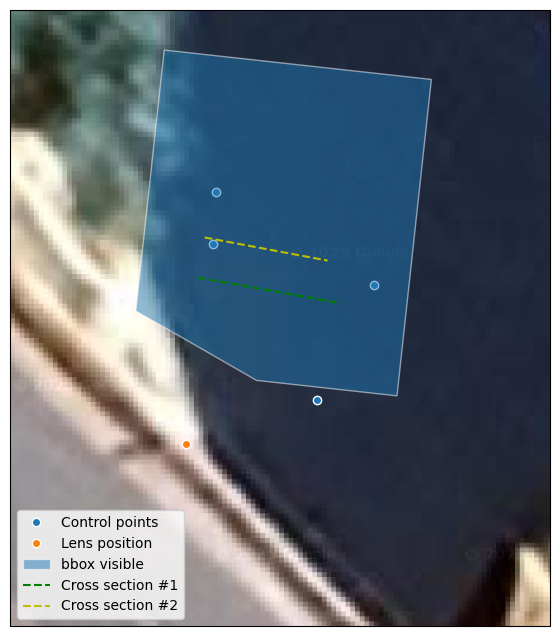

In [3]:
cross_section = pd.read_csv("./ngwerere_cross_section.csv")
x = cross_section["x"]
y = cross_section["y"]
z = cross_section["z"]
cross_section2 = pd.read_csv("./ngwerere_cross_section_2.csv")
x2 = cross_section2["x"]
y2 = cross_section2["y"]
z2 = cross_section2["z"]

# let's have a look at the cross sections, the coordinates of the cross sections are in UTM 35S coordinates,
# so we have to tell the axes that the coordinates need to be transformed from that crs into the crs of the axes.
# we also make a very very small buffer of 0.00005 degrees around the area of interest, so that we can
# clearly see the cross sections.
ax = ds.velocimetry.camera_config.plot(tiles="GoogleTiles", zoom_level=22, tiles_kwargs={"style": "satellite"}, buffer=0.00005)
ax.plot(x, y, "g--", transform=ccrs.UTM(zone=35, southern_hemisphere=True), label="Cross section #1")
ax.plot(x2, y2, "y--", transform=ccrs.UTM(zone=35, southern_hemisphere=True), label="Cross section #2")
ax.legend()



In [4]:
ds_points = ds.velocimetry.get_transect(x, y, z, crs=32735, rolling=4)
ds_points2 = ds.velocimetry.get_transect(x2, y2, z2, crs=32735, rolling=4)
ds_points


<xarray.Dataset> Size: 12kB
Dimensions:       (points: 36, quantile: 5)
Coordinates: (12/13)
    xp            (points) float64 288B 463.7 490.1 ... 1.229e+03 1.249e+03
    yp            (points) float64 288B 330.4 337.2 343.9 ... 522.0 526.9 531.9
    xs            (points) float64 288B 6.427e+05 6.427e+05 ... 6.427e+05
    ys            (points) float64 288B 8.304e+06 8.304e+06 ... 8.304e+06
    lon           (points) float64 288B 28.33 28.33 28.33 ... 28.33 28.33 28.33
    lat           (points) float64 288B -15.33 -15.33 -15.33 ... -15.33 -15.33
    ...            ...
    y             (points) float64 288B 6.418 6.279 6.139 ... 1.809 1.669 1.53
    xcoords       (points) float64 288B 6.427e+05 6.427e+05 ... 6.427e+05
    ycoords       (points) float64 288B 8.304e+06 8.304e+06 ... 8.304e+06
    scoords       (points) float64 288B 0.0 0.14 0.28 0.42 ... 4.62 4.76 4.9
    zcoords       (points) float64 288B 1.182e+03 1.182e+03 ... 1.183e+03
  * quantile      (quantile) float64 40B 0.05 0.25 0.5 0.75 0.95
Dimensions without coordinates: points
Data variables:
    s2n           (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
    corr          (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
    v_x           (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
    v_y           (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
    cols          (points) float64 288B 19.78 19.71 19.64 ... 17.54 17.47 17.4
    rows          (points) float64 288B 12.26 13.26 14.26 ... 45.19 46.18 47.18
    v_dir         (points) float64 288B -4.645 -4.645 -4.644 ... -4.645 -4.645
    v_eff_nofill  (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
Attributes:
    camera_shape:   [1080, 1920]
    camera_config:  {\n    "height": 1080,\n    "width": 1920,\n    "crs": "P...
    h_a:            0.0
    chunksize:      20

In [5]:
ds_points_q = ds_points.transect.get_q(fill_method="log_interp")
ds_points_q2 = ds_points2.transect.get_q(fill_method="log_interp")
ds_points_q


<xarray.Dataset> Size: 16kB
Dimensions:       (points: 36, quantile: 5)
Coordinates: (12/13)
    xp            (points) float64 288B 463.7 490.1 ... 1.229e+03 1.249e+03
    yp            (points) float64 288B 330.4 337.2 343.9 ... 522.0 526.9 531.9
    xs            (points) float64 288B 6.427e+05 6.427e+05 ... 6.427e+05
    ys            (points) float64 288B 8.304e+06 8.304e+06 ... 8.304e+06
    lon           (points) float64 288B 28.33 28.33 28.33 ... 28.33 28.33 28.33
    lat           (points) float64 288B -15.33 -15.33 -15.33 ... -15.33 -15.33
    ...            ...
    y             (points) float64 288B 6.418 6.279 6.139 ... 1.809 1.669 1.53
    xcoords       (points) float64 288B 6.427e+05 6.427e+05 ... 6.427e+05
    ycoords       (points) float64 288B 8.304e+06 8.304e+06 ... 8.304e+06
    scoords       (points) float64 288B 0.0 0.14 0.28 0.42 ... 4.62 4.76 4.9
    zcoords       (points) float64 288B 1.182e+03 1.182e+03 ... 1.183e+03
  * quantile      (quantile) float64 40B 0.05 0.25 0.5 0.75 0.95
Dimensions without coordinates: points
Data variables:
    s2n           (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
    corr          (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
    v_x           (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
    v_y           (quantile, points) float64 1kB nan nan nan nan ... nan nan nan
    cols          (points) float64 288B 19.78 19.71 19.64 ... 17.54 17.47 17.4
    rows          (points) float64 288B 12.26 13.26 14.26 ... 45.19 46.18 47.18
    v_dir         (points) float64 288B -4.645 -4.645 -4.644 ... -4.645 -4.645
    v_eff_nofill  (quantile, points) float64 1kB 0.0 nan nan nan ... 0.0 0.0 0.0
    v_eff         (quantile, points) float64 1kB 0.0 0.06588 0.1443 ... 0.0 0.0
    q_nofill      (quantile, points) float64 1kB 0.0 nan nan nan ... 0.0 0.0 0.0
    q             (quantile, points) float64 1kB 0.0 0.00574 0.02032 ... 0.0 0.0
Attributes:
    camera_shape:   [1080, 1920]
    camera_config:  {\n    "height": 1080,\n    "width": 1920,\n    "crs": "P...
    h_a:            0.0
    chunksize:      20

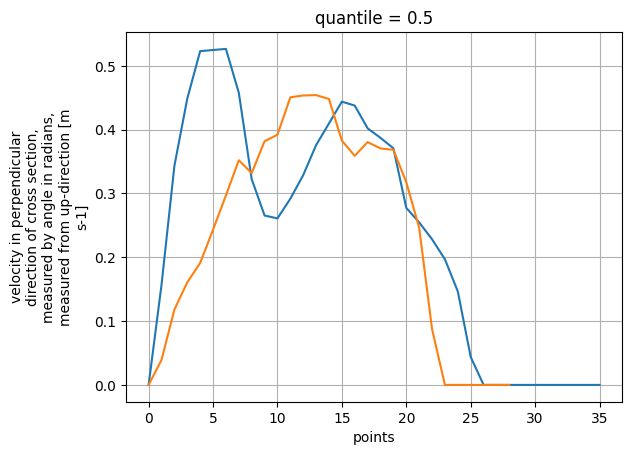

In [6]:
ax = plt.axes()
ds_points_q["v_eff"].isel(quantile=2).plot(ax=ax)
ds_points_q2["v_eff"].isel(quantile=2).plot(ax=ax)
plt.grid()


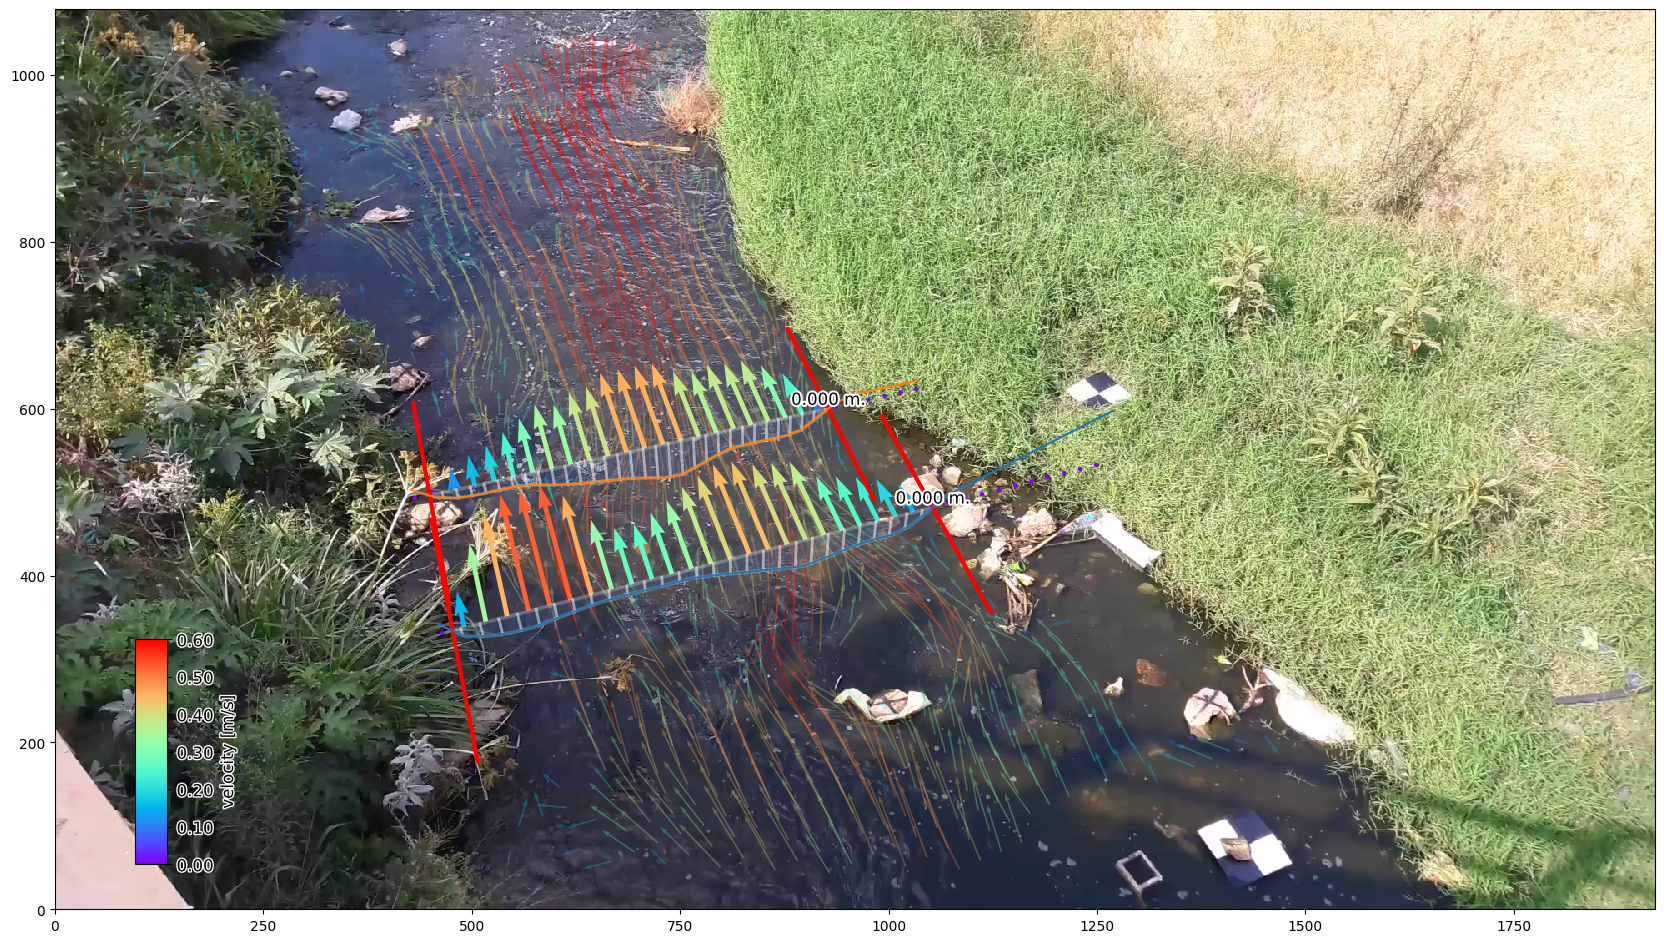

In [7]:
# plot the rgb frame first. We use the "camera" mode to plot the camera perspective.
norm = Normalize(vmin=0., vmax=0.6, clip=False)

p = da_rgb[0].frames.plot(mode="camera")

# extract mean velocity and plot in camera projection
ds.mean(dim="time", keep_attrs=True).velocimetry.plot(
    ax=p.axes,
    mode="camera",
    cmap="rainbow",
    scale=200,
    width=0.001,
    alpha=0.3,
    norm=norm,
)

# plot velocimetry point results in camera projection
ds_points_q.isel(quantile=2).transect.plot(
    ax=p.axes,
    mode="camera",
    cmap="rainbow",
    scale=100,
    width=0.003,
    norm=norm,
)
ds_points_q2.isel(quantile=2).transect.plot(
    ax=p.axes,
    mode="camera",
    cmap="rainbow",
    scale=100,
    width=0.003,
    norm=norm,
    add_colorbar=True
)

# store figure in a JPEG
p.axes.figure.savefig("ngwerere.jpg", dpi=200)

c:\Users\dhaba\anaconda3\envs\cwprs\Lib\site-packages\matplotlib\colors.py:2243: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
c:\Users\dhaba\anaconda3\envs\cwprs\Lib\site-packages\matplotlib\colors.py:2250: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


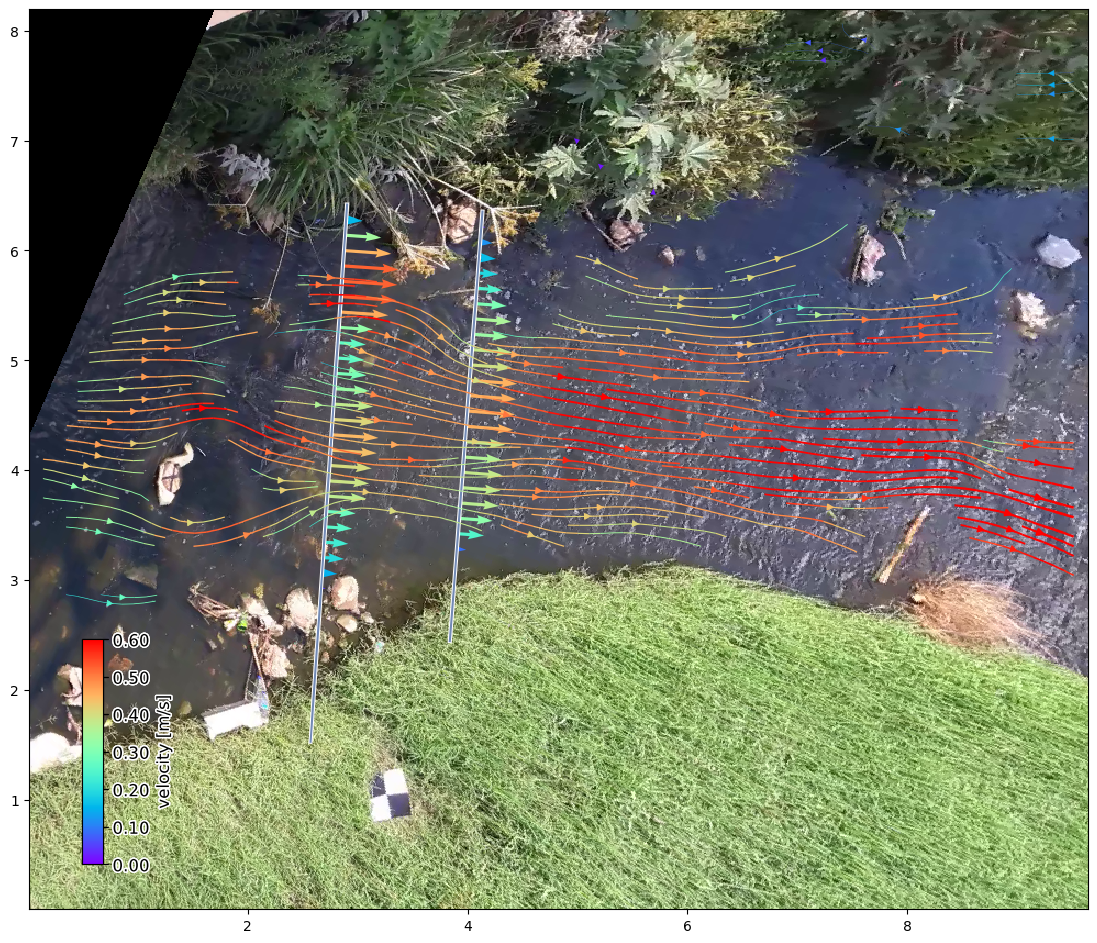

In [8]:
# again plot the projected background
from matplotlib.colors import Normalize
norm = Normalize(vmin=0, vmax=0.6, clip=False)
ds_mean = ds.mean(dim="time", keep_attrs=True)
p = da_rgb.frames.project()[0].frames.plot(mode="local")

# plot velocimetry point results in local projection
ds_points_q.isel(quantile=2).transect.plot(
    ax=p.axes,
    mode="local",
    cmap="rainbow",
    scale=10,
    width=0.003,
    norm=norm,
    add_colorbar=True,
)

ds_points_q2.isel(quantile=2).transect.plot(
    ax=p.axes,
    mode="local",
    cmap="rainbow",
    scale=10,
    width=0.003,
    norm=norm,
    add_colorbar=True,
)
# to ensure streamplot understands the directions correctly, all values must
# be flipped upside down and up-down velocities become down-up velocities.
ds_mean.velocimetry.plot.streamplot(
    ax=p.axes,
    mode="local",
    density=3.,
    minlength=0.05,
    linewidth_scale=2,
    cmap="rainbow",
    norm=norm,
    add_colorbar=True
)

In [9]:
ds_points_q.transect.get_river_flow()
print(ds_points_q["river_flow"])
ds_points_q2.transect.get_river_flow()
print(ds_points_q2["river_flow"])

<xarray.DataArray 'river_flow' (quantile: 5)> Size: 40B
array([0.10238643, 0.14907206, 0.18290723, 0.21600935, 0.25111294])
Coordinates:
  * quantile  (quantile) float64 40B 0.05 0.25 0.5 0.75 0.95
Attributes:
    standard_name:  river_discharge
    long_name:      River Flow
    units:          m3 s-1
<xarray.DataArray 'river_flow' (quantile: 5)> Size: 40B
array([0.11262982, 0.16948381, 0.20087959, 0.22870729, 0.27887088])
Coordinates:
  * quantile  (quantile) float64 40B 0.05 0.25 0.5 0.75 0.95
Attributes:
    standard_name:  river_discharge
    long_name:      River Flow
    units:          m3 s-1
